# Feature extraction and thresholding

The chosen method of obtaining a segmented image can have a profound influence on the features you measure further downstream in your analysis. In this notebook, we will use different methods to create segmented (and labelled) images and then see how this affects the obtained measurements.

In [6]:
from skimage import data, filters, measure
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Plotting multiple curves into a single graph

Comparing measurements visually can be easily achieved by combining the results from multiple measurements into a single plot. Matplotlib makes such things quite easy! 

In [7]:
random_data1 = np.random.normal(0, 1, 1000)
random_data2 = np.random.normal(0, 1, 1000) + 1

The next cell shows how to combine multiple curves/plots in a single figure. 

*Optional:* Change the value for `bins` to see what effect it has on the plotted histogram:

Text(0, 0.5, 'Counts')

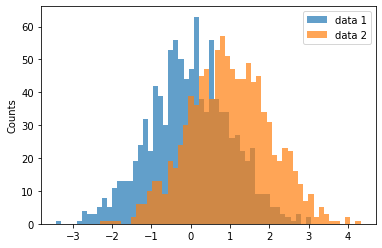

In [8]:
fig, ax = plt.subplots()
ax.hist(random_data1, bins=50, label='data 1', alpha=0.7)
ax.hist(random_data2, bins=50, label='data 2', alpha=0.7)
ax.legend()
ax.set_ylabel('Counts')

## Exercises

For simplicity, we will keep on working with some relatively simple data:

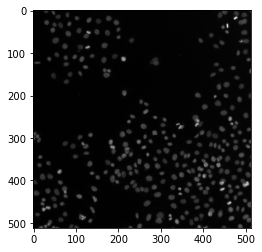

In [9]:
image = data.human_mitosis()
plt.imshow(image, cmap='gray')

## Exercise 1
Now, pick three threshold methods of your choice from `skimage.filters` to create three binary images and three respective labelled images:

In [ ]:
binary_method1 = 
binary_method2 = 
binary_method3 = 

In [ ]:
labelled_method1 = 
labelled_method2 = 
labelled_method3 = 

*Optional*: You can try plotting these three side by side using matplotlib *subplots*. You can create a figure with multiple subplots using the `plt.subplots()` command:

In [ ]:
plt.subplots?

Modify the code below to show the three thresholded image with a title that indicates which method corresponds to which image:

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[1].imshow(image, cmap='gray')
axes[2].imshow(image, cmap='gray')

axes[0].set_title('Title 1')
axes[1].set_title('Title 1')
axes[2].set_title('Title 1')

*Note*: The variable `axes` contains references to each subplot, whereas the whole figure is stored in the `fig` variable. Since we have multiple subplots, `axes` can be accessed like a numpy array:

In [ ]:
axes[0]

## Exercise 2:

Just like in the previous notebooks, we use the `regionprops_table()` function to measure several features. Use this function to measure the following features:

- area
- perimeter
- solidity
- mean intensity
- max intensity
- min intensity
- major axis length

*Hint 1*: The [previous notebook]('./04_feature_extraction.ipynb') described a way to easily measure multiple features simultaneously from an image. 

*Hint 2*: Measureing intensity within the respective objects requires to pass both an intensity image as well as labelled image to `regionprops_table()`. If you do not know how to do this, check the documentation to find out how (`regionprops_table?`).

## Exercise 3

Use what you learned above with regard to combining multiple curves into a single plot to see how the selection of the threshold method affects the measured results

## Exercise 4

In the lecture, you learned how to measure *roundness* and *circularity* of objects. Neither of these is available through `regionprops_table`, so we have to calculate them ourselves. They are defined as following:

- *Roundness* = $\frac{4 \cdot A}{\pi \cdot \text{major}}$, where `major` and `A` correspond to the major axis of the ellipse fitted to the object and the object's area
- *Circularity* = $\frac{4 \cdot \pi A}{perimeter^2}$

To do so, retrieve area, perimeter and major axis length from any of the derived measurements and convert them to numpy arrays. 

*Hint 1*: Pandas DataFrame allow to conveniently convert data in table columns to numpy arrays with `my_dataframe['column_name'].to_numpy()`
*Hint 2*: To obtain the value of $\pi$, simply get it from numpy with `np.pi()`

If you have area, perimeter and major axis length for every object stored in separate variables, calculate roundness and circularity according to the formulas above

In [ ]:
roundness = 4 * areas/(np.pi() * major_axis_lengths)
ciruclarity = 

## Exercise 5

Visualize the roundness and circularity as a histogram:

## Exercise 6

It can be interesting to plot multiple features of the measured objects with respect to each other. We can do this for any given pair of features by using the scatter plot function from matplotlib. Replace the `feature1` and `feature2` entries to do this for your measured data.

In [ ]:
fig, ax = plt.subplots()
ax.scatter(feature1, feature2)